<a href="https://colab.research.google.com/github/bhavvveesh/Flask-Text-Tool/blob/main/diabetic-retinopathy-demo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install -U -q kaggle
!mkdir -p ~/.kaggle

!mv kaggle.json ~/.kaggle/kaggle.json
!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
!mkdir -p data
!kaggle competitions download -c aptos2019-blindness-detection -p data

100% 8.00G/8.01G [01:07<00:00, 116MB/s]
100% 8.01G/8.01G [01:07<00:00, 128MB/s]
100% 1.50G/1.50G [00:17<00:00, 120MB/s]

  0% 0.00/53.7k [00:00<?, ?B/s]
100% 53.7k/53.7k [00:00<00:00, 55.7MB/s]
  0% 0.00/24.5k [00:00<?, ?B/s]
100% 24.5k/24.5k [00:00<00:00, 8.09MB/s]
  0% 0.00/28.3k [00:00<?, ?B/s]
100% 28.3k/28.3k [00:00<00:00, 13.7MB/s]


In [ ]:
!curl -s https://course.fast.ai/setup/colab | bash
from fastai import *
from fastai.vision import *
from fastai.metrics import accuracy, error_rate
from sklearn.metrics import accuracy_score

import numpy as np
import cv2

In [ ]:
!unzip ./data/aptos2019-blindness-detection.zip -d aptos

In [ ]:
os.mkdir("./train_images")
os.mkdir("./test_images")
os.mkdir("./aptosdata")

!unzip ./data/test_images.zip -d ./aptosdata/test
!unzip ./data/train_images.zip -d ./aptosdata/train

In [ ]:
for x in os.listdir("./aptosdata/train/"):

    img = cv2.imread("./aptosdata/train/"+x,0)
    clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8,8))
    cl1 = clahe.apply(img)
    cv2.imwrite("./train_images/"+x,cl1)

for x in os.listdir("./aptosdata/test/"):

    img = cv2.imread("./aptosdata/test/"+x,0)
    clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8,8))
    cl1 = clahe.apply(img)
    cv2.imwrite("./test_images/"+x,cl1)

In [ ]:
test_df = pd.read_csv("./data/test.csv")
test_img = ImageList.from_df(test_df, path=".", folder='/test_images',suffix='.png')

train_df = pd.read_csv("./data/train.csv")
tfms = get_transforms(do_flip=True,flip_vert=True,max_rotate=360,max_warp=0,max_zoom=1.1,max_lighting=0.1,p_lighting=0.5)

In [ ]:
np.random.seed(5)
data = (ImageList.from_df(train_df,path=".",folder="/train_images",suffix='.png')
        .split_by_rand_pct()
        .label_from_df(cols='diagnosis')
        .add_test(test_img)
        .transform(tfms,size = 224)
        .databunch(bs=64)
        .normalize(imagenet_stats)
       )

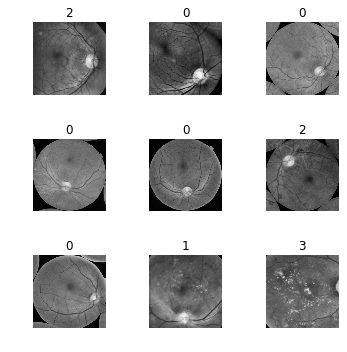

In [ ]:
data.show_batch(rows=3,figsize = (5,5))

In [ ]:
data.valid_ds.classes

[0, 1, 2, 3, 4]

In [ ]:
model = cnn_learner(data,models.resnet50, metrics = [accuracy,error_rate],callback_fns=ShowGraph)

Downloading: "https://download.pytorch.org/models/resnet50-19c8e357.pth" to /root/.cache/torch/checkpoints/resnet50-19c8e357.pth
100%|██████████| 97.8M/97.8M [00:01<00:00, 93.0MB/s]


In [ ]:
!cp /content/drive/My\ Drive/aptosdata/model.pth ./models

In [ ]:
model.load("model")

Learner(data=ImageDataBunch;

Train: LabelList (2930 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
4,1,0,0,4
Path: .;

Valid: LabelList (732 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
0,0,0,0,2
Path: .;

Test: LabelList (1928 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: EmptyLabelList
,,,,
Path: ., model=Sequential(
  (0): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace)
    (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (4): Sequential(
      (0): Bottleneck(
        (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=Fals

In [ ]:
# Open a image
img = open_image("/content/type 4_clahe.png")

In [ ]:
# Predict the class of the image using the model
model.predict(img)

(Category 4,
 tensor(4),
 tensor([1.6893e-05, 6.9749e-04, 2.2694e-03, 5.4010e-02, 9.4301e-01]))